### Business Objective:
- The goal of this project is to segment customers into meaningful groups based on their behavior so that a business can tailor marketing strategies, pricing, or retention efforts.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Displayings settings
#tells pandas displaying dataframe, show all columns not just some of them
pd.set_option("display.max_columns", None)

In [3]:
#Loading the dataset
df = pd.read_excel("../data/Online Retail.xlsx")
df.head()
#each row represents one transaction

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#understanding the data
df.shape
df.info()
#customerid has missing data points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Dataset Description
- InvoiceNo: Unique invoice number
- StockCode: Product code
- Description: Product name
- Quantity: Number of items purchased
- InvoiceDate: Date and time of purchase
- UnitPrice: Price per item
- CustomerID: Unique customer identifier
- Country: Customer country

In [5]:
#Identifying data quality issues
df.isnull().sum()

#checking for negative or zero value
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


### Business interpretation
- Transactions without CustomerID cannot be used for customer-level analysis
- Quantity and Unit price has non-zero values. Problematic

In [6]:
#Data Cleaning

#removing missing cutsomer ID
df = df.dropna(subset=["CustomerID"])
#remove invalid quantities and prices
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
#convert data types

#defensive programming(just for safety because the variable inoicedate seems to be already a datetime)
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["customerID"] = df["CustomerID"].astype(int)

### Comment
- I ensured numeric identifiers are integers and timestamps are datetime objects for time-based analysis

In [7]:
# Feature Engineering 

#Total Revenue Column
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

#Extracting time features
df["Month"] = df["InvoiceDate"].dt.month
df["Day"] = df["InvoiceDate"].dt.day
df["Hour"] = df["InvoiceDate"].dt.hour

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,customerID,TotalPrice,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,17850,15.30,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850,20.34,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,17850,22.00,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850,20.34,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850,20.34,12,1,8


In [8]:
#Exploratory data analysis

#Revenue by country
country_revenue = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)
country_revenue.head(10)

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: TotalPrice, dtype: float64

### Revenue by Country 
- I group the data by country, calculate the total revenue per country by summing transactions values, and then sort the results in descending order to identify the top performing markets

### Insights
- The Uk generates the majority of revenue, suggesting marketing efforts are highly concentrated there

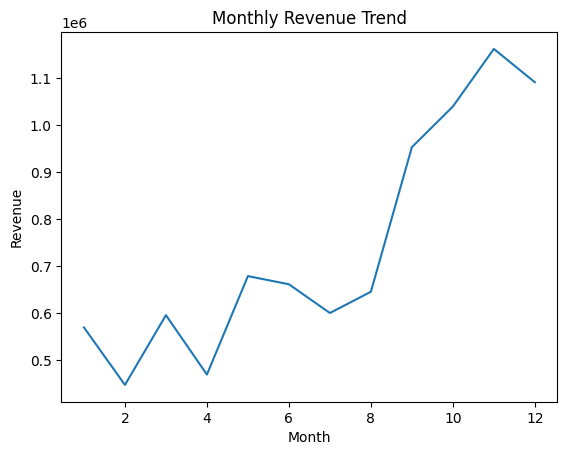

In [9]:
#Monthly revenue trend
monthly_revenue = df.groupby("Month")["TotalPrice"].sum()

monthly_revenue

plt.figure()
monthly_revenue.plot(kind="line")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

### Business Insight for monthly revenue analysis
- Revenue shows a clear seasonal trend: it peaks in November and December, likely due to holiday shopping and is low in the 4 months of the year.

In [10]:
# Top-selling products
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False)
top_products.head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

In [11]:
#Customer level analysis 

#Revenue per customer
customer_revenue = df.groupby("CustomerID")["TotalPrice"].sum()
customer_revenue.describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: TotalPrice, dtype: float64

### Insights
- The average revenue per customer is about 2054(currency units)
- The mean is much higher than the median, this tells us the distribution is skewed
- 25% of customers spent 307 or less
- half of the customers spent 764 or less
- Median < mean (right-skewed distribution)
- 75% of customers spent 1662 or less. Only 25% of customers spent more than this.
- The higheste spending customer spent over 280k. This single customer heavily pulls the mean upward
- Classic outlier/VIP customer

#### Conclusion
Revenue is dominated by a small number of high value customers, while the majority contribue relatively little.

In [12]:
#Simple segementation (RFM-style)
customer_summary = df.groupby("CustomerID").agg(
    {
        "InvoiceDate": "max", #most recent purchase date (R(recency) in RFM)
        "InvoiceNo": "nunique", #count how many unique invoices the customer has (F(Frequency))
        "TotalPrice": "sum" #add up all the money they spent(M(Monetary value))
    }
)

customer_summary.columns = ["LastPurchase", "Frequency", "Monetary"]
customer_summary.head(30)

#LastPurchase is a date but clustering algorithms cannot work with dates
#Convert LastPurchase to Recency(number of days since last purchase)
#1) creating a refernece date
#reference date wull be set to the day after the most recent invoice date in the DataFrame
reference_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)


In [13]:
customer_summary

,LastPurchase,Frequency,Monetary
CustomerID,,,
12346.0,2011-01-18 10:01:00,1,77183.60
12347.0,2011-12-07 15:52:00,7,4310.00
12348.0,2011-09-25 13:13:00,4,1797.24
12349.0,2011-11-21 09:51:00,1,1757.55
12350.0,2011-02-02 16:01:00,1,334.40
...,...,...,...
18280.0,2011-03-07 09:52:00,1,180.60
18281.0,2011-06-12 10:53:00,1,80.82
18282.0,2011-12-02 11:43:00,2,178.05


In [14]:
#Convert LastPurchase to Recency(Days)
customer_summary["Recency"] = (
    reference_date - customer_summary["LastPurchase"]
).dt.days
customer_summary.head(10)

#dropping LastPruchase (we no longer need it)
customer_summary = customer_summary.drop(columns=["LastPurchase"])

#Just reordering columns for clarity
customer_summary = customer_summary[["Recency", "Frequency", "Monetary"]]


In [15]:
customer_summary
#Recency , Frequency and Monetary are the first 3 features I will start with then keep adding when needed

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,2,178.05
